In [2]:
import pandas as kande
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = kande.read_csv('/content/drive/MyDrive/Transactions_data_complet.csv')

In [6]:
transactions_per_day = df.groupby('TransactionStartTime').size()
transactions_per_day

,0
TransactionStartTime,
2018-11-15T02:18:49Z,1
2018-11-15T02:19:08Z,1
2018-11-15T02:44:21Z,1
2018-11-15T03:32:55Z,1
2018-11-15T03:34:21Z,1
...,...
2019-02-13T09:54:09Z,1
2019-02-13T09:54:25Z,1
2019-02-13T09:54:35Z,1


In [7]:
df.sample((50))

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
93665,TransactionId_61744,BatchId_23554,AccountId_4841,SubscriptionId_3829,CustomerId_4051,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-11T14:21:38Z,2,0
83730,TransactionId_22307,BatchId_32630,AccountId_4841,SubscriptionId_3829,CustomerId_4999,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-496.0,496,2019-02-02T22:20:44Z,2,0
85257,TransactionId_21527,BatchId_122535,AccountId_4508,SubscriptionId_1913,CustomerId_4969,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-04T14:38:35Z,2,0
69091,TransactionId_131631,BatchId_83564,AccountId_4251,SubscriptionId_51,CustomerId_4704,UGX,256,ProviderId_6,ProductId_14,financial_services,ChannelId_3,523.0,523,2019-01-23T12:01:48Z,2,0
12555,TransactionId_134706,BatchId_106428,AccountId_1746,SubscriptionId_136,CustomerId_2135,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-12-01T05:39:53Z,2,0
88545,TransactionId_17585,BatchId_98340,AccountId_3761,SubscriptionId_4563,CustomerId_4204,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,11000.0,11000,2019-02-08T05:04:58Z,2,0
8427,TransactionId_95192,BatchId_57408,AccountId_3013,SubscriptionId_4519,CustomerId_3438,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,1000.0,1000,2018-11-25T19:12:20Z,2,0
51605,TransactionId_12073,BatchId_41727,AccountId_140,SubscriptionId_4299,CustomerId_462,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,650.0,650,2019-01-06T09:21:50Z,2,0
37167,TransactionId_2509,BatchId_111958,AccountId_2618,SubscriptionId_4511,CustomerId_3036,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-22T14:51:50Z,2,0
90805,TransactionId_18635,BatchId_23583,AccountId_1060,SubscriptionId_2067,CustomerId_1413,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,10800.0,10800,2019-02-08T17:57:39Z,2,0


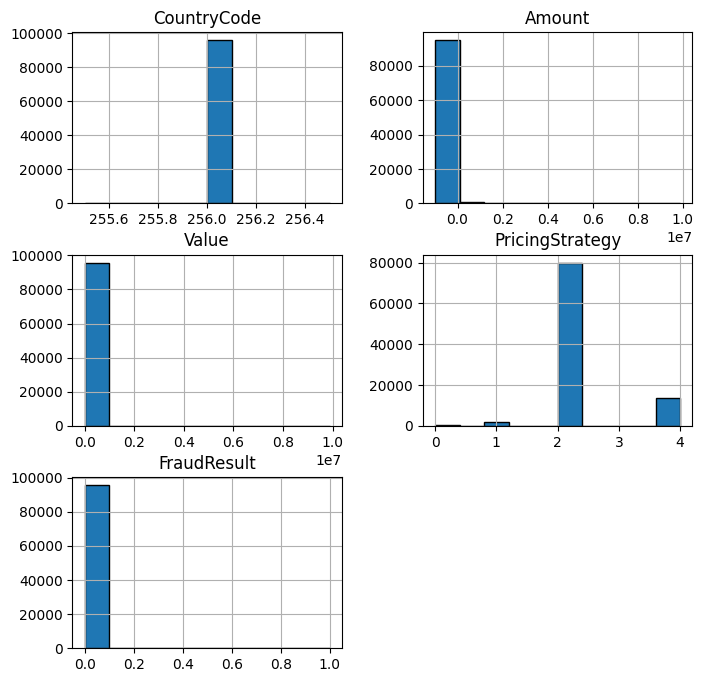

In [8]:
df.hist(figsize=(8,8), edgecolor = "black")
plt.show()

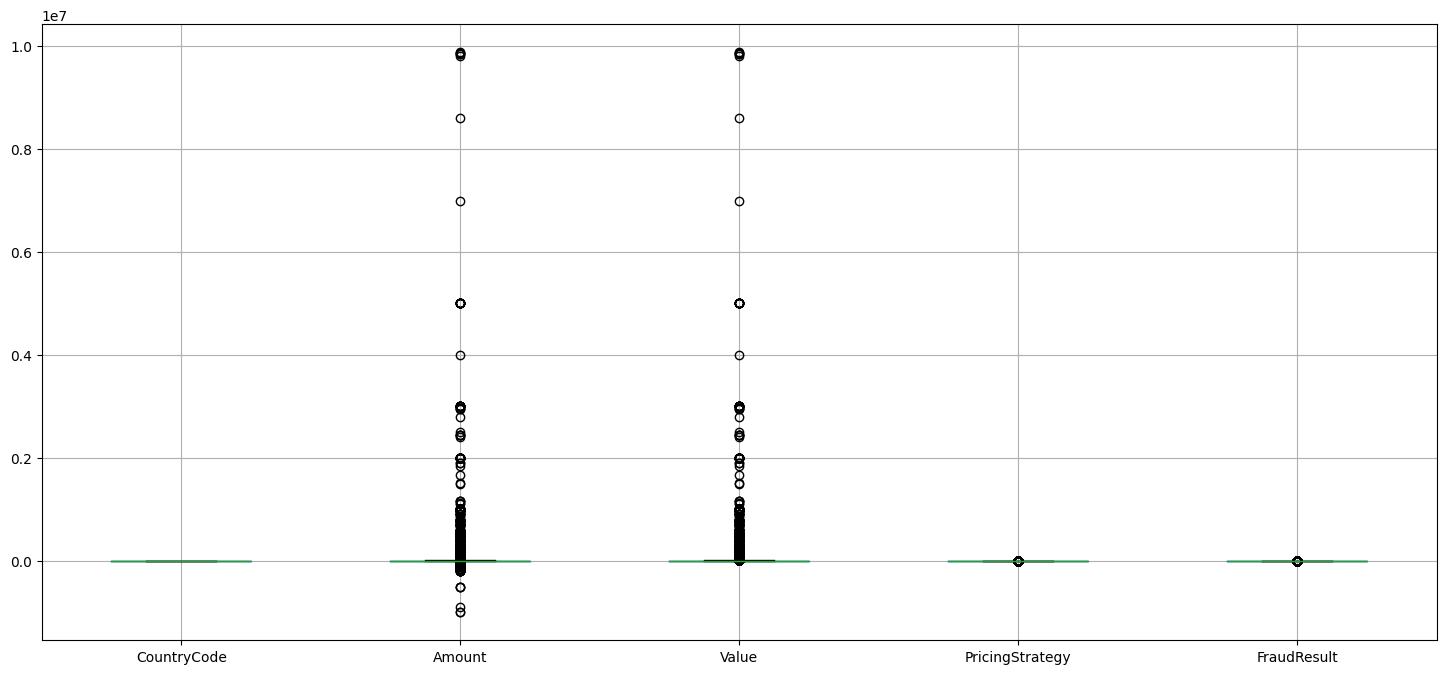

In [9]:
df.boxplot(figsize=(18,8))
#plt.figure(figsize=(18,10))
#sns.boxplot(df, orient='h')
plt.show()

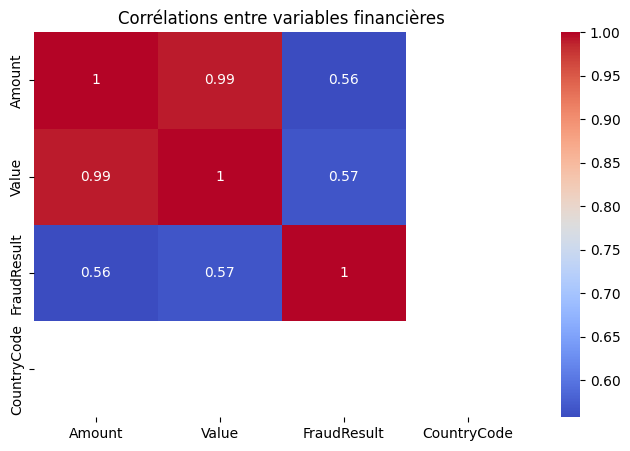

In [10]:
slice_df_corr = df[['Amount', 'Value','FraudResult','CountryCode']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(slice_df_corr,annot= True, cmap='coolwarm')
plt.title("Corrélations entre variables financières")
plt.show()

In [11]:
# Revenus par catégorie
revenue_per_category = df.groupby('ProductCategory')['Value'].sum().sort_values(ascending=False).reset_index( )
revenue_per_category

,ProductCategory,Value
0,financial_services,578208500
1,airtime,272404327
2,utility_bill,40217649
3,tv,23222085
4,ticket,20886500
5,data_bundles,5990700
6,transport,4256000
7,movies,1922900
8,other,1000


In [12]:
fig = px.bar(revenue_per_category,
             x='ProductCategory', y='Value',
             title="Revenu total par catégorie de produit",
             color='Value')
fig.show()

In [13]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [14]:
#il y a des valeurs negatives dans les montants on cherche à les comprendre pourquoi
cols = ['Amount']
df[cols] = df[cols].replace(0, np.nan).mask(df[cols] < 0, np.nan)

In [15]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,5.747300e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,1.379425e+04,9.900584e+03,2.255974,0.002018
std,0.0,1.582981e+05,1.231221e+05,0.732924,0.044872
min,256.0,1.000000e+01,2.000000e+00,0.000000,0.000000
25%,256.0,1.000000e+03,2.750000e+02,2.000000,0.000000
50%,256.0,2.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,1.000000e+04,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [16]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [ ]:
##AJOUTER LA COLONNE DATE df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
ajoutDate = kande.DataFrame(df)
ajoutDate['Date'] = kande.NaT

In [17]:
df.sample(100)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
42112,TransactionId_32087,BatchId_89571,AccountId_4841,SubscriptionId_3829,CustomerId_4840,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,NaN,50,2018-12-27T11:06:54Z,2,0
70211,TransactionId_37141,BatchId_38996,AccountId_2431,SubscriptionId_3237,CustomerId_2846,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,2000.0,2000,2019-01-24T15:37:05Z,2,0
19768,TransactionId_74869,BatchId_110084,AccountId_4791,SubscriptionId_2791,CustomerId_5260,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-12-07T15:09:17Z,1,0
94219,TransactionId_131217,BatchId_112739,AccountId_352,SubscriptionId_1465,CustomerId_682,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-12T04:39:26Z,2,0
77039,TransactionId_33011,BatchId_82095,AccountId_630,SubscriptionId_4049,CustomerId_969,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,5000.0,5000,2019-01-29T07:49:17Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,TransactionId_43314,BatchId_62991,AccountId_4841,SubscriptionId_3829,CustomerId_1768,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,NaN,200,2019-01-03T19:30:21Z,2,0
715,TransactionId_30588,BatchId_14459,AccountId_4841,SubscriptionId_3829,CustomerId_1608,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,NaN,125,2018-11-15T21:44:17Z,2,0
52379,TransactionId_76038,BatchId_109815,AccountId_619,SubscriptionId_2891,CustomerId_959,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-01-07T18:41:39Z,4,0
94385,TransactionId_139258,BatchId_17862,AccountId_2743,SubscriptionId_2662,CustomerId_3164,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-12T07:23:38Z,2,0


In [18]:
dt = kande.DataFrame(df)
median_value = dt['Amount'].median()
for index in range(len(df)):
    if kande.isna(df.at[index, 'Amount']):
        df.at[index, 'Amount'] = median_value

print(df)

              TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          UGX          256   
2       SubscriptionId_2

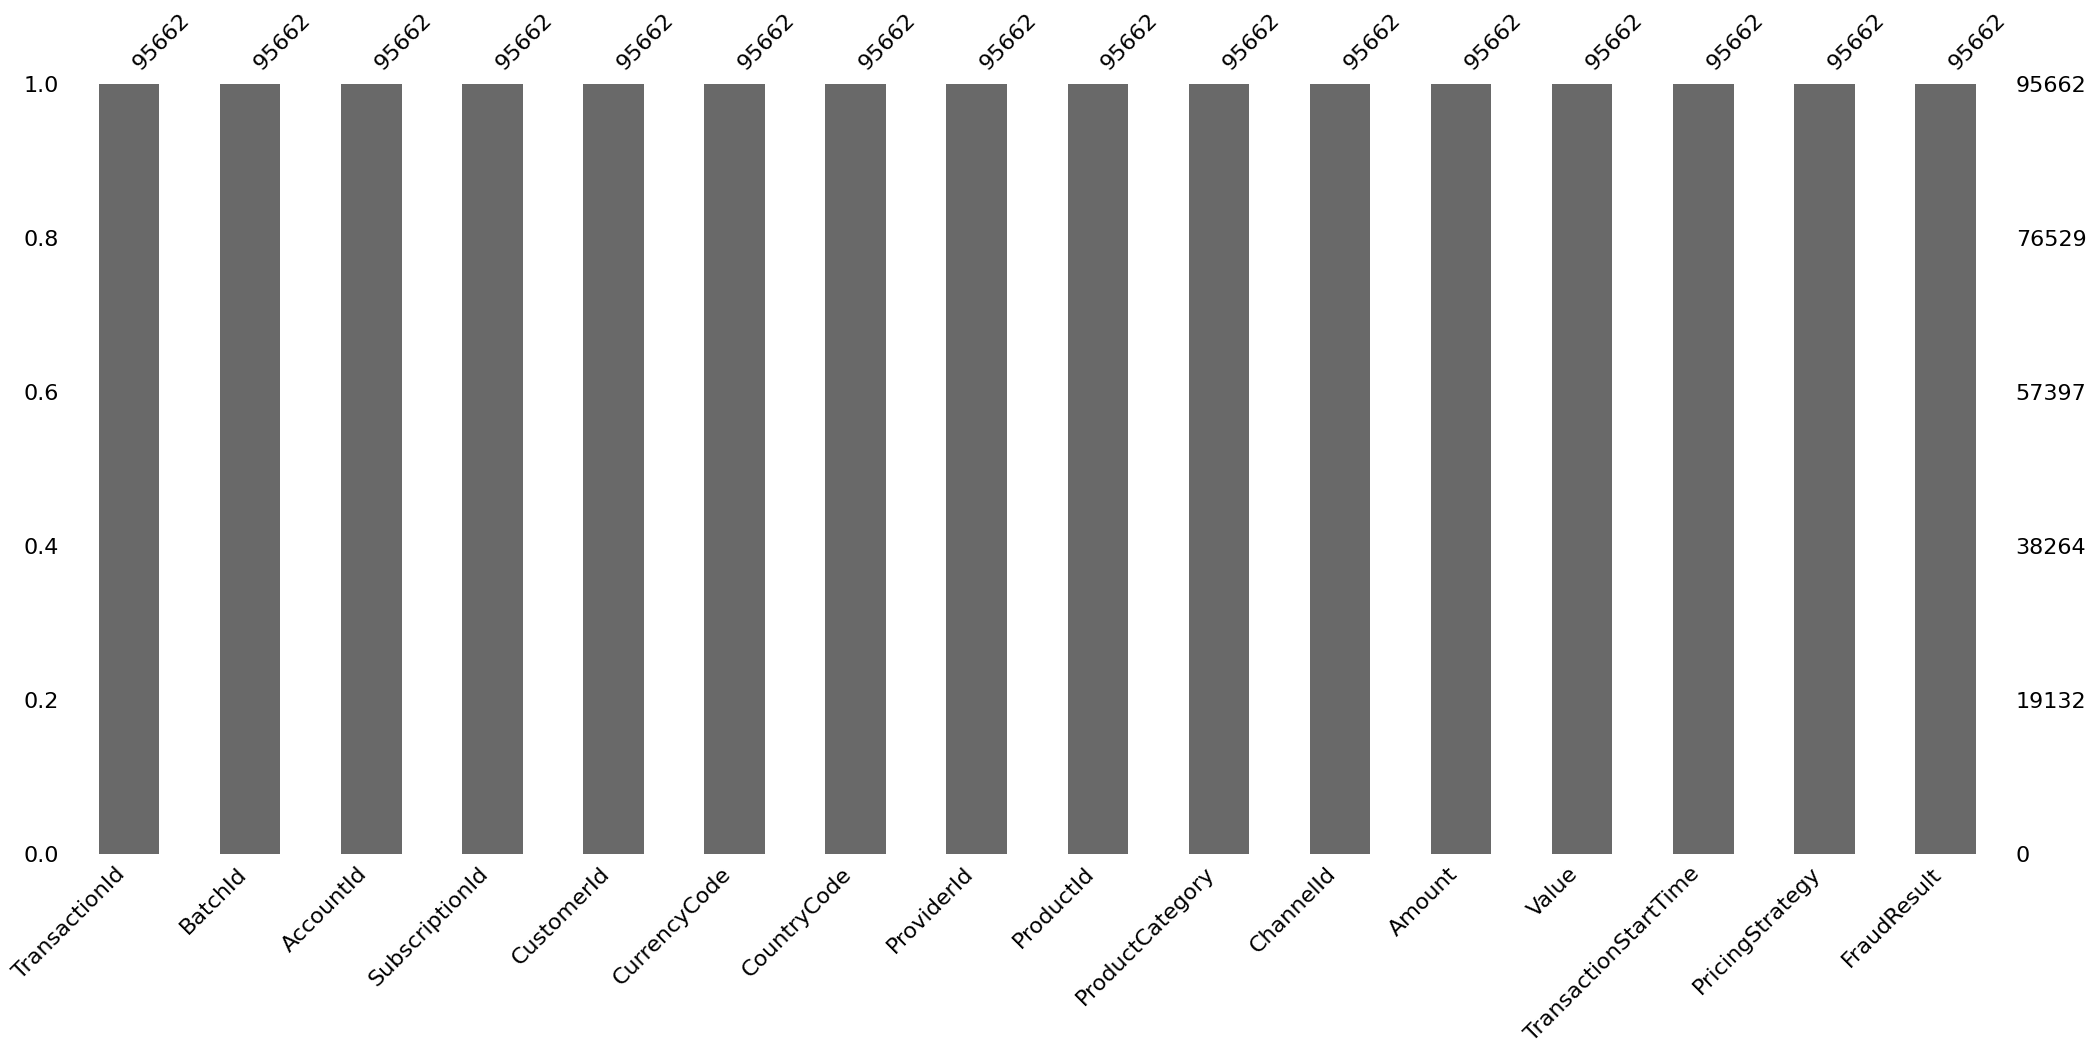

In [ ]:
#Lorsque nous avons un volume de données, on utilise cette bibliotheque pour verifier les valeurs manquantes
import missingno as msno
msno.bar(df);


<Axes: >

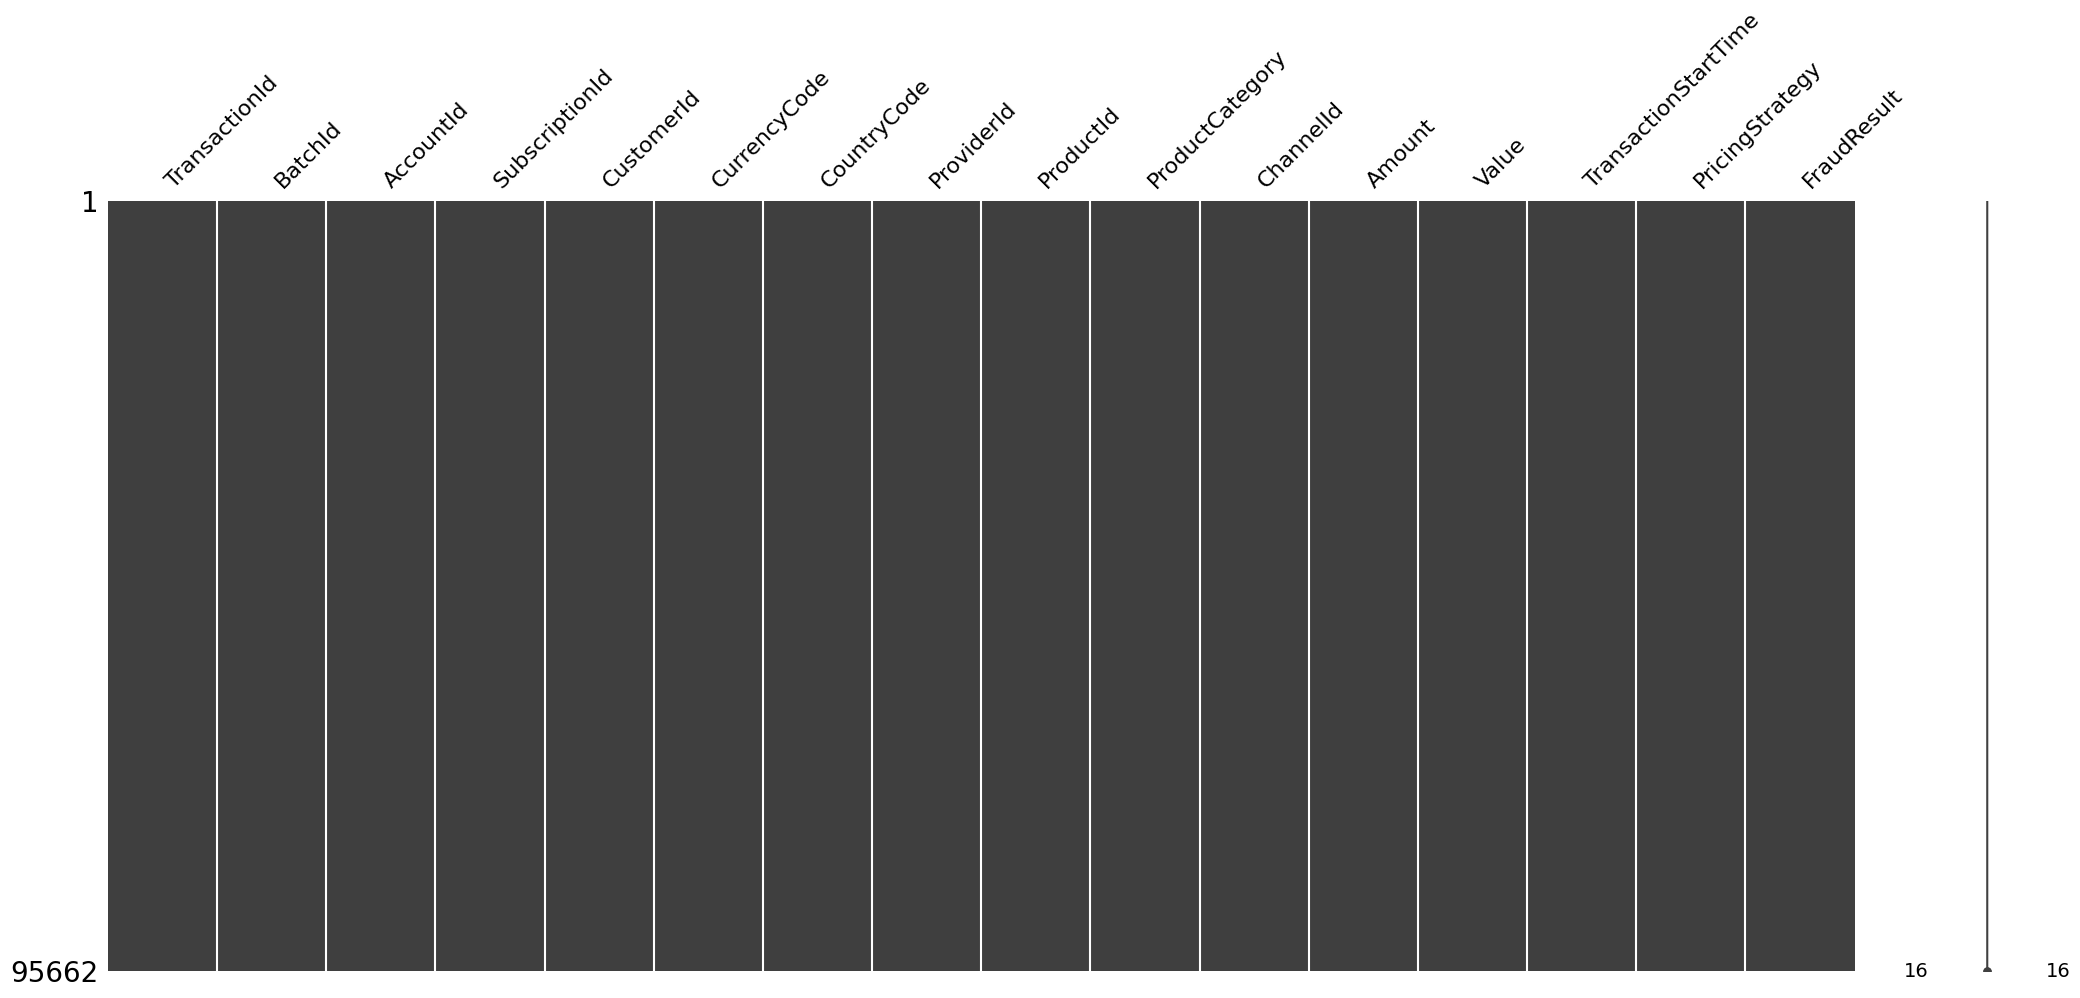

In [ ]:
#Lorsque nous avons un volume de données, on utilise cette bibliotheque pour verifier les valeurs manquantes
msno.matrix(df)

In [ ]:
df.shape

(95662, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

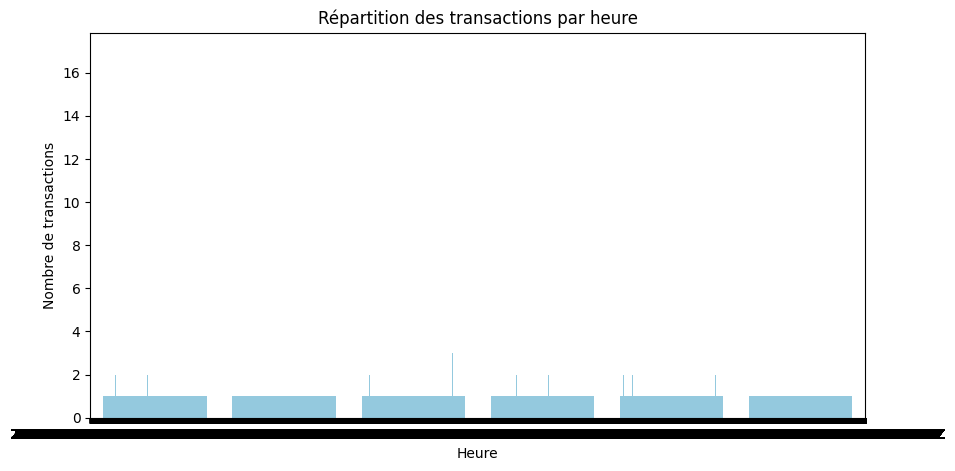

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='TransactionStartTime', color='skyblue')
plt.title("Répartition des transactions par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre de transactions")
plt.show()

In [ ]:
#Pour afficher les valeurs duplicate
df.duplicated().sum()
#Pour supprimer les doublons
df.drop_duplicates()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


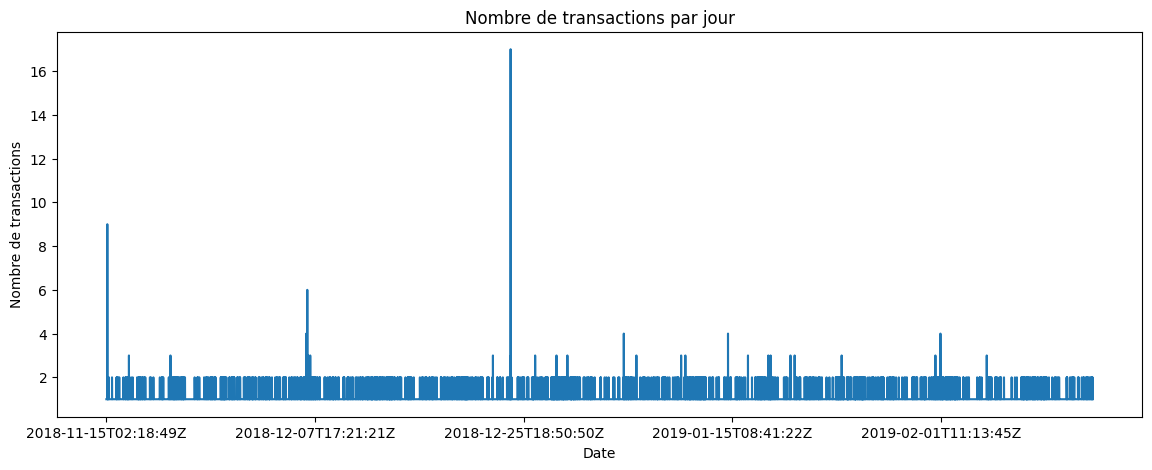

In [ ]:
plt.figure(figsize=(14, 5)) # définir la figure
transactions_per_day.plot() # line plot
plt.title("Nombre de transactions par jour")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.show()

In [ ]:
#Gestion des valeurs manquantes
df.isnull().sum()

,0
TransactionId,0
BatchId,0
AccountId,0
SubscriptionId,0
CustomerId,0
CurrencyCode,0
CountryCode,0
ProviderId,0
ProductId,0
ProductCategory,0
